In [1]:
import numpy as np
import requests
from IPython.core.display import HTML
url = 'https://raw.githubusercontent.com/saadtony/NumericalMethods/master/styles/custom.css'
def css_styling():
    style = requests.get(url)
    return HTML(style.text)
css_styling()

In [29]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [38]:
def thomas(ml, mu, md, mb):
    l = ml.copy()
    u = mu.copy()
    d = md.copy()
    b = mb.copy()
    n = len(b)
    result = np.zeros(n)
    for i in range(1, n):
        d[i] = d[i] - u[i-1]*l[i-1]/d[i-1]
        b[i] = b[i] - b[i-1]*l[i-1]/d[i-1]
    
    result[n-1] = b[n-1]/d[n-1]
    for i in range(n-2, -1, -1):
        result[i] = (b[i]-u[i]*result[i+1])/d[i]
    return result

# Heat Transfer in a Rod

The equation governing one-dimensional heat transfer in a rod is:

$$\frac{d^2T}{dx^2} = -\frac{1}{k}S(x)$$

In [23]:
# Testing the Thimas algorithm compared to np.linalg.solve

d = np.array([2., 2., -1., -1.])
u = np.array([-3., -1., 1.])
l = np.array([1., 4., 2.])
b = np.array([-4., 2., 9., 2.])

In [21]:
thomas(l,u,d,b)

1
2
3


array([1., 2., 3., 4.])

In [24]:
A = np.diag(l,-1)+np.diag(d,0)+np.diag(u,1)
A

array([[ 2., -3.,  0.,  0.],
       [ 1.,  2., -1.,  0.],
       [ 0.,  4., -1.,  1.],
       [ 0.,  0.,  2., -1.]])

In [25]:
np.linalg.solve(A, b)

array([1., 2., 3., 4.])

In [26]:
# Creating the domain for the rod
L = 1.
n = 100
dx = L/(n-1)
x = np.linspace(0, L, n)

In [27]:
# Source term
def source(x):
    σ = 0.1
    x0 = 2./3.
    return 0.1*np.exp(-(x-x0)**2/σ/σ)

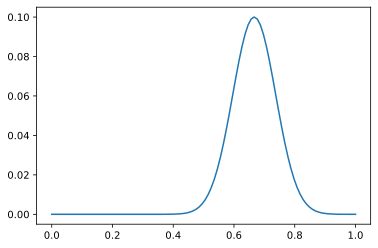

In [30]:
plt.plot(x, source(x))

In [41]:
tl = 300
tr = 350
k = 1e-5

d = -2.0*np.ones(n)
d[0] = 1.
d[-1] = 1.
l = np.ones(n-1)
l[-1] = 0
u = np.ones(n-1)
u[0] = 0

A = np.diag(l, -1) + np.diag(d, 0) + np.diag(u, 1)
A

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1., -2.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1., -2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., -2.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1., -2.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [42]:
# build the RHS
b = -dx*dx*source(x)/k
b[0] = tl
b[-1] = tr

In [43]:
# solve with built-in solvers
T = np.linalg.solve(A, b)

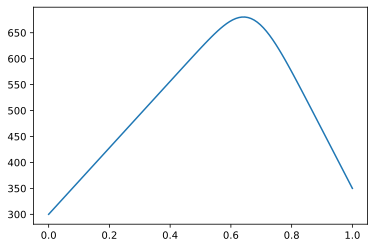

In [44]:
plt.plot(x, T)

In [45]:
T_tdma = thomas(l, u, d, b)

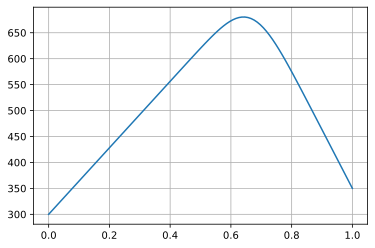

In [47]:
plt.plot(x, T_tdma)
plt.grid()